In [40]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
import torch
import torch_geometric
import torch_scatter
import torch_sparse
import torch_cluster
import torch_spline_conv
import networkx as nx

import matplotlib.pyplot as plt

import sklearn
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from scipy.stats import zscore, pearsonr, uniform
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV

from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


# **Load in Data Frames**

In [31]:
# categorical variable dataframe

file_path_trainC = "/content/drive/My Drive/data csv/TRAIN_CATEGORICAL.csv"
df1 = pd.read_csv(file_path_trainC)


In [32]:
train_cat = pd.read_csv(file_path_trainC)
train_cat.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [33]:
train_cat.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

In [42]:
# Functional Connection Matrices

file_path_trainFCM = "/content/drive/My Drive/data csv/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv"
df2 = pd.read_csv(file_path_trainC)

In [43]:
train_FCM = pd.read_csv(file_path_trainFCM)

In [44]:
train_FCM.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [45]:
train_FCM.columns

Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn',
       '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn',
       '0throw_9thcolumn',
       ...
       '195throw_196thcolumn', '195throw_197thcolumn', '195throw_198thcolumn',
       '195throw_199thcolumn', '196throw_197thcolumn', '196throw_198thcolumn',
       '196throw_199thcolumn', '197throw_198thcolumn', '197throw_199thcolumn',
       '198throw_199thcolumn'],
      dtype='object', length=19901)

In [46]:
print(train_FCM)

     participant_id  0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
0      70z8Q2xdTXM3          0.093473          0.146902          0.067893   
1      WHWymJu6zNZi          0.029580          0.179323          0.112933   
2      4PAQp1M6EyAo         -0.051580          0.139734          0.068295   
3      obEacy4Of68I          0.016273          0.204702          0.115980   
4      s7WzzDcmDOhF          0.065771          0.098714          0.097604   
...             ...               ...               ...               ...   
1208   kTurROKp5YHQ          0.022932          0.024830         -0.006514   
1209   FCRyMz9O6yCq          0.047078          0.135955          0.144366   
1210   vm2P1hmAY1hl          0.094541          0.145280          0.061964   
1211   OFxvN8lnw21w         -0.001533          0.128562          0.045000   
1212   9gpepMI9sj5q         -0.115224          0.147713          0.083183   

      0throw_4thcolumn  0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolum

## Preprocess FCM to feed into GNN

In [47]:
train_FCM = train_FCM.drop(columns=['participant_id'])

def vector_to_adjacency(vector):
    #Converts a vector to an adjacency matrix

    adj_matrix = np.zeros((200, 200))

    # Fill the lower triangle of the matrix
    triu_indices = np.triu_indices(200, k=1)
    adj_matrix[triu_indices] = vector
    adj_matrix += adj_matrix.T  # Make it symmetric

    return adj_matrix

adj_matrices = np.array([vector_to_adjacency(row) for row in train_FCM.to_numpy()])
print(adj_matrices.shape)

(1213, 200, 200)


In [50]:
def adjacency_to_edge_list(adj_matrix, threshold=0.1):
    edge_index = np.array(np.where(adj_matrix > threshold))  # Only keep strong edges, helps with multicollinearity?
    edge_weight = adj_matrix[edge_index[0], edge_index[1]]

    return torch.tensor(edge_index, dtype=torch.long), torch.tensor(edge_weight, dtype=torch.float)

edge_data = [adjacency_to_edge_list(adj) for adj in adj_matrices]

#unpack weights and indices
edge_indices = [data[0] for data in edge_data]
edge_weights = [data[1] for data in edge_data]

print(edge_indices[0].shape) #shape will have two rows for source and target nodes
print(edge_weights[0].shape)

torch.Size([2, 862])
torch.Size([862])


In [51]:
#convert all edge lists to graph objects
graphs = [torch_geometric.data.Data(x=torch.eye(200), edge_index=e_idx, edge_attr=e_wt)
          for e_idx, e_wt in zip(edge_indices, edge_weights)]

print(graphs[0])

Data(x=[200, 200], edge_index=[2, 862], edge_attr=[862])


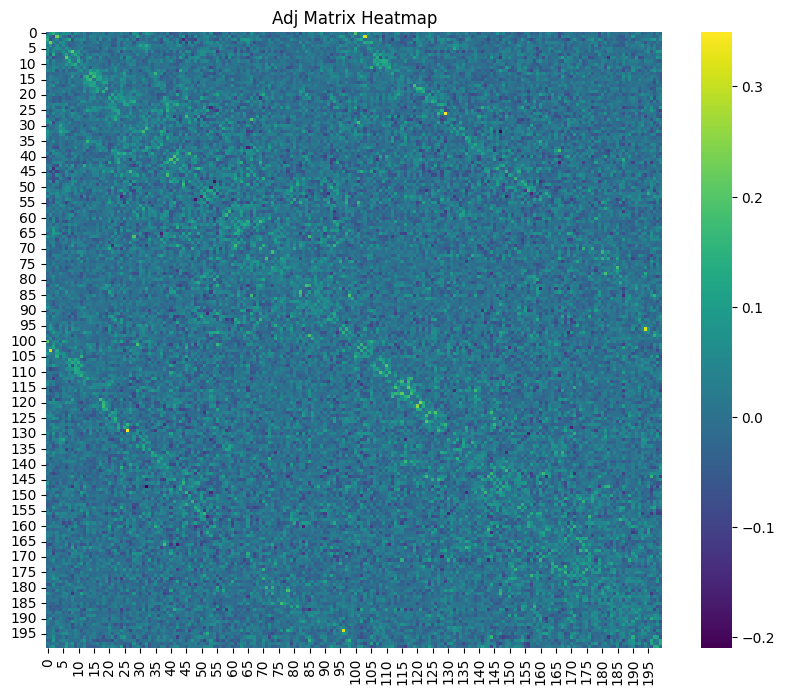

In [57]:
#validate conversions

sample_adj_matrix = adj_matrices[0]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(sample_adj_matrix, cmap="viridis", square=True)
plt.title("Adj Matrix Heatmap")
plt.show()


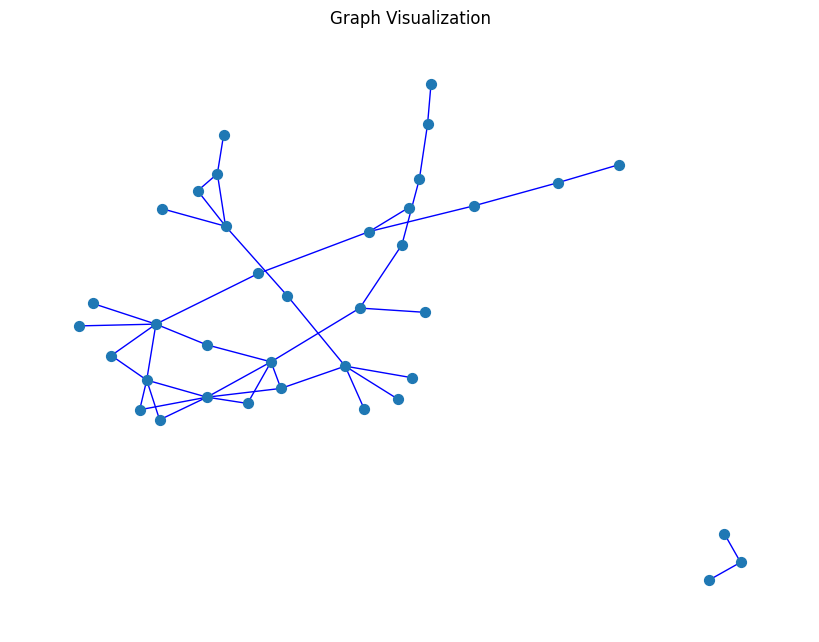

In [53]:
def visualize_graph(edge_index, title="Graph Visualization", node_limit=50):
    """
    Plots a NetworkX graph based on edge_index.
    """
    G = nx.Graph()
    edges = edge_index.numpy().T

    G.add_edges_from(edges[:node_limit])

    plt.figure(figsize=(8, 6))
    nx.draw(G, node_size=50, with_labels=False, edge_color="blue")
    plt.title(title)
    plt.show()

# graph first participant's graph
visualize_graph(edge_indices[0])

In [ ]:
# Quantitative variable train dataframe

file_path_trainQ = '/content/drive/My Drive/data csv/TRAIN_QUANTITATIVE.csv'
train_Quant = pd.read_csv(file_path_trainQ)
train_Quant.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


In [ ]:
train_Quant.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

In [ ]:
# ADHD and Sex solutions dataframe for model training

file_path_trainS = '/content/drive/My Drive/data csv/TRAINING_SOLUTIONS.csv'
train_Solutions = pd.read_csv(file_path_trainS)
train_Solutions.head()

,participant_id,ADHD_Outcome,Sex_F,Unnamed: 3,Unnamed: 4
0,UmrK0vMLopoR,1,1,NaN,NaN
1,CPaeQkhcjg7d,1,0,NaN,NaN
2,Nb4EetVPm3gs,1,0,NaN,NaN
3,p4vPhVu91o4b,1,1,NaN,NaN
4,M09PXs7arQ5E,1,1,NaN,NaN


In [ ]:
train_Solutions.columns

Index(['participant_id', 'ADHD_Outcome', 'Sex_F', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

# **Exploratory Data Analysis**

Use .info() and .describe() to summarize each dataset.

In [ ]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB


Understand the distribution of the categorical variables with .value_counts().

In [ ]:
# Barratt_Barratt_P2_Occ - Barratt Simplified Measure of Social Status - Parent 2 Occupation
train_cat['Barratt_Barratt_P2_Occ'].value_counts()

# look back at the dictionary to see what category these integers [0, 45, 35] represent.

,count
Barratt_Barratt_P2_Occ,
0,287
45,239
35,195
30,149
40,116
15,86
20,41
5,38
10,37


Notice the parent 2 occupation with the most frequency is 0: homemaker, stay at home parent.

**Visualize distributions:**

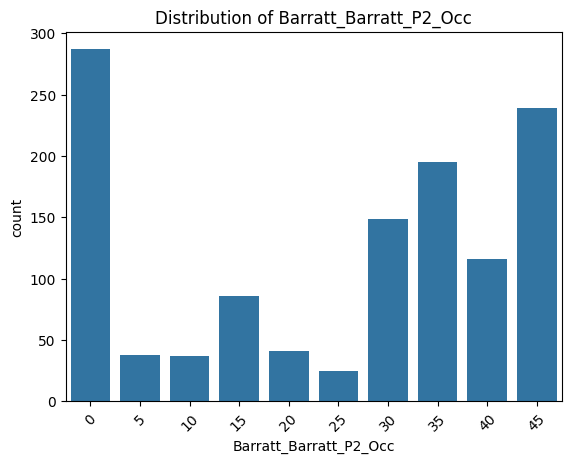

In [ ]:
sns.countplot(x='Barratt_Barratt_P2_Occ', data=train_cat[['Barratt_Barratt_P2_Occ']])
plt.title(f"Distribution of Barratt_Barratt_P2_Occ")
plt.xticks(rotation=45)
plt.show()

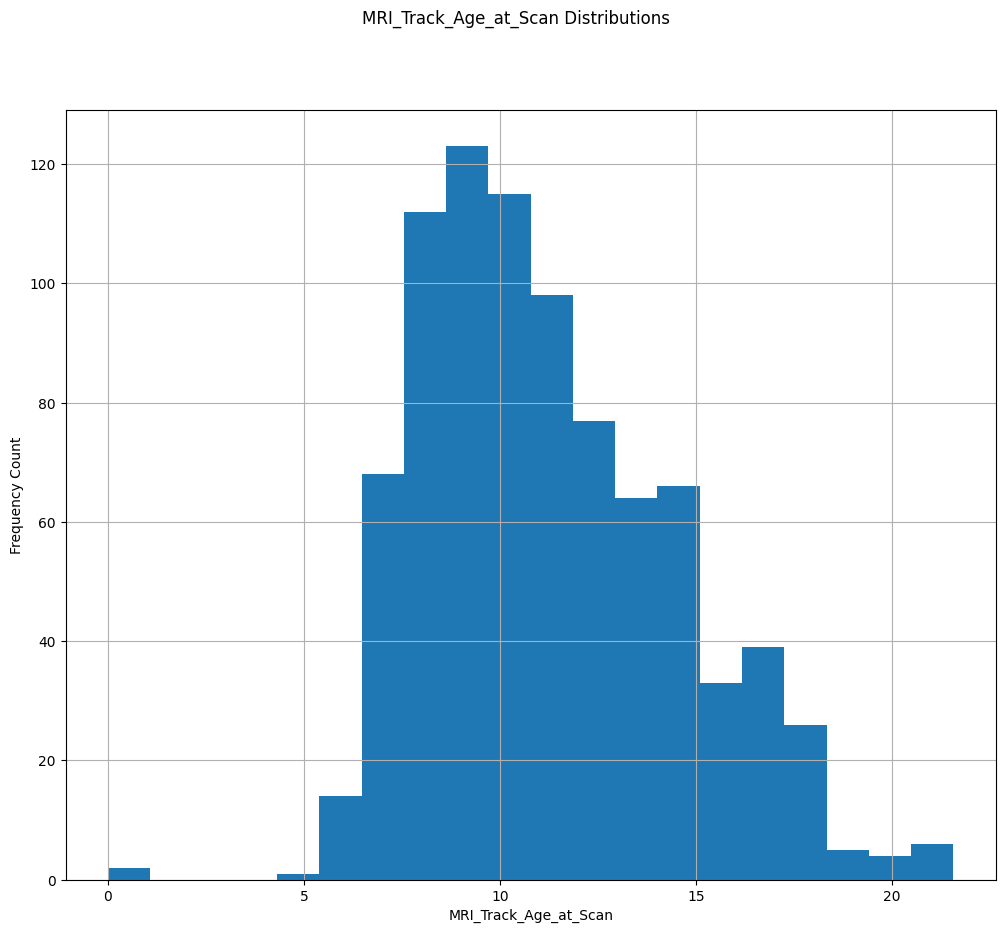

In [ ]:
# Distribution of MRI_Track_Age_at_Scan
train_Quant['MRI_Track_Age_at_Scan'].hist(figsize=(12, 10), bins=20)
plt.suptitle("MRI_Track_Age_at_Scan Distributions")
plt.xlabel('MRI_Track_Age_at_Scan')
plt.ylabel('Frequency Count')
plt.show()

In [ ]:
# Gender distribution
train_Solutions['Sex_F'].value_counts()

,count
Sex_F,
0,797
1,416


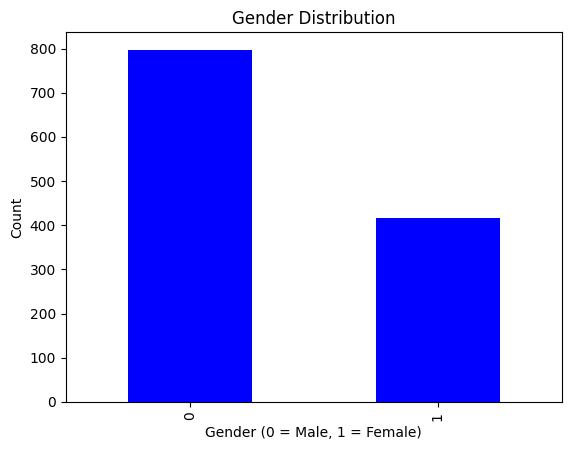

In [ ]:
train_Solutions['Sex_F'].value_counts().plot(kind='bar', color='blue')
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.show()